# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

#### Problem Statement

E-news express has created a new landing page and they are testing if this will lead to more new subscribers. The have randomly selected 100 users and divided them equally into two different groups. The control group has the old landing page while the treatment group has the new landing page.

#### Objective

1. Explore Data set and extract insights using Exploratory Data Analysis
2. Do users spend more time on the new landing page vs the old landing page?
3. Is the conversation rate for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language?
5. Is the mean time spent on the new page the same for different language users?

## Import all the necessary libraries

In [3]:
set "var=%cd%"
cd var
ipython notebook

SyntaxError: invalid syntax (<ipython-input-3-72328e5b1baf>, line 1)

In [391]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [392]:
# write the code for reading the dataset abtest.csv

df = pd.read_csv('abtest.csv')

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [393]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [394]:
df.shape

(100, 6)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [396]:
# Change objects type columns to category type
for column in df[['group','landing_page','converted','language_preferred']]:
    df[column] = df[column].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.5 KB


In [397]:
# Check null values in Dataframe
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Summary Statistics

In [398]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [399]:
df['group'].value_counts()

treatment    50
control      50
Name: group, dtype: int64

In [400]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [401]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [402]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

**Observations**
* There are 100 users
* There are 6 columns
* There are no null values
* There are 2 numeric fields and 4 categorical fields
* The main numeric field we will want to analyze is time spent on the page
* The average time spent on the page is 5.37 minutes
* There are 2 groups which have 50 users each
* There are 2 landing pages which have 50 users each
* 54 users have been converted while 46 have not
* There are 3 Langauges Spanish, French and English

### Univariate Analysis

In [403]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [404]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#### Analysis of Time Spent on Page Column

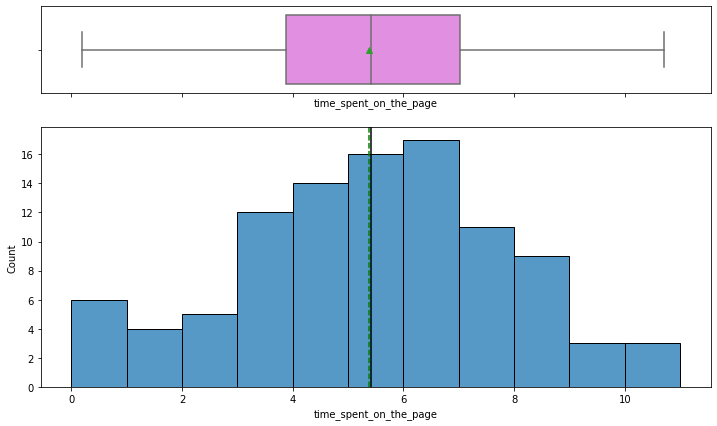

In [405]:
histogram_boxplot(df,'time_spent_on_the_page', bins=[0,1,2,3,4,5,6,7,8,9,10,11])

#### Analysis of Group Column

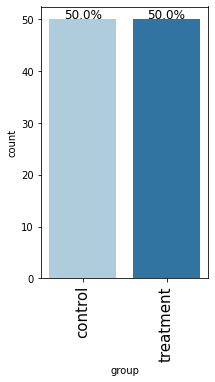

In [406]:
labeled_barplot(df,'group',perc = True)

#### Analysis of Landing Page Column

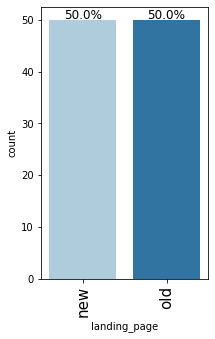

In [407]:
labeled_barplot(df,'landing_page',perc = True)

#### Analysis of Converted Column

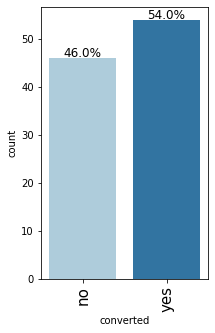

In [408]:
labeled_barplot(df,'converted',perc = True)

#### Analysis of Language Preferred Column

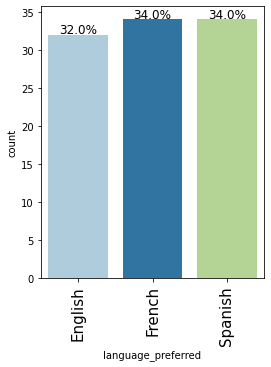

In [409]:
labeled_barplot(df,'language_preferred',perc = True)

**Univariate Observations**
* Time spent on the page is skewed towards the middle with most users being between 4-7
* The most common time people spend is between 6-7 minutes
* Control and Treatment groups have same amount of users
* New and Old landing page have same amount of users
* 54% of users are Converted while 46% are not
* 34% of users prefer French
* 34% of users prefer Spanish
* 32% of users prefer English

### Bivariate Analysis

#### Analysis of Group vs Time Spent on Page

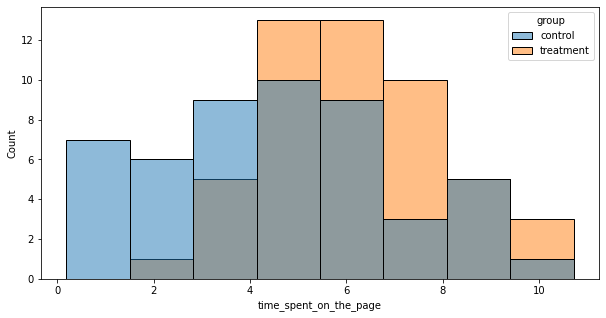

In [410]:
plt.figure(figsize=(10, 5))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'group')
plt.show()

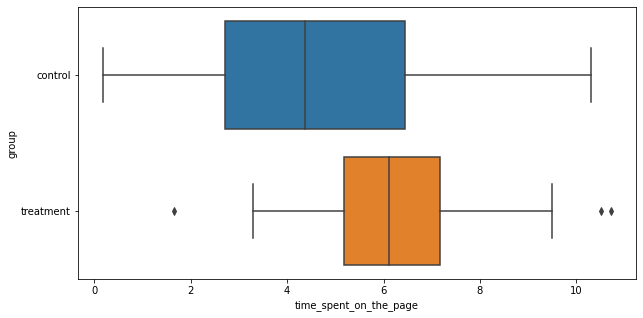

In [411]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'group')
plt.show()

#### Analysis of Language Preferred vs Time Spent on Page

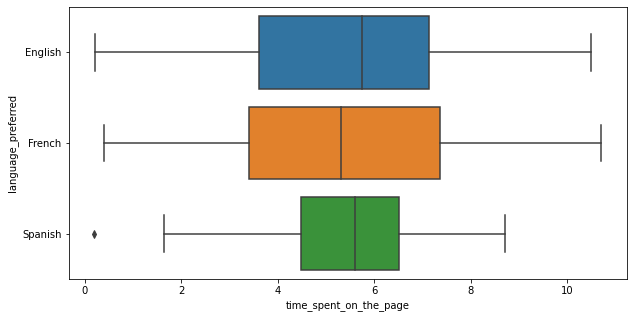

In [412]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'language_preferred')
plt.show()

#### Analysis of Landing Page  vs Time Spent on Page

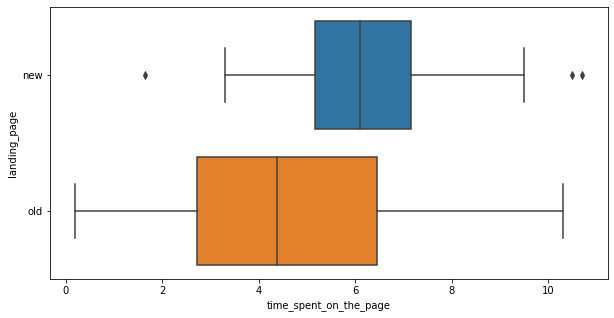

In [413]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'landing_page')
plt.show()

#### Analysis of Landing Page  vs Time Spent on Page by Converted

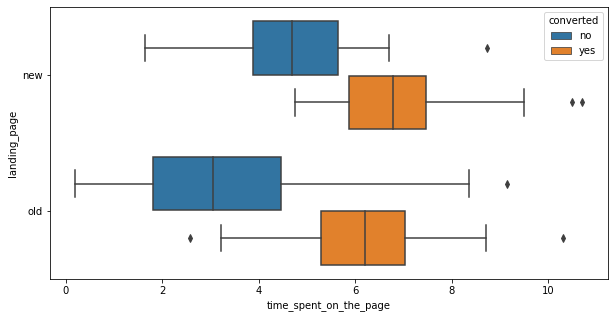

In [414]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'landing_page', hue='converted')
plt.show()

#### Analysis of Conversion Status  vs Time Spent on Page

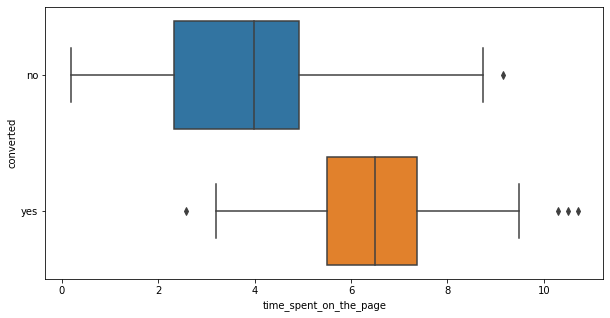

In [415]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'converted')
plt.show()

#### Analysis of Landing Page  vs Converted by Landing Page

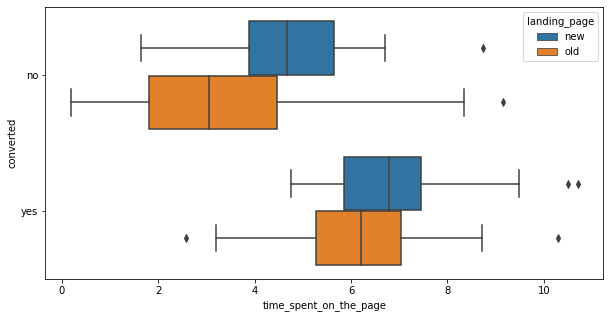

In [416]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'converted', hue='landing_page')
plt.show()

#### Analysis of Landing page vs Language Preferred

In [417]:
pd.crosstab(df['landing_page'],df['language_preferred'])

language_preferred,English,French,Spanish
landing_page,,,
new,16,17,17
old,16,17,17


#### Analysis of Converted vs Language Preferred

In [418]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='columns')

language_preferred,English,French,Spanish
converted,,,
no,0.34375,0.558824,0.470588
yes,0.65625,0.441176,0.529412


#### Analysis of Time Spent on the Page vs Language Preferred by Landing Page

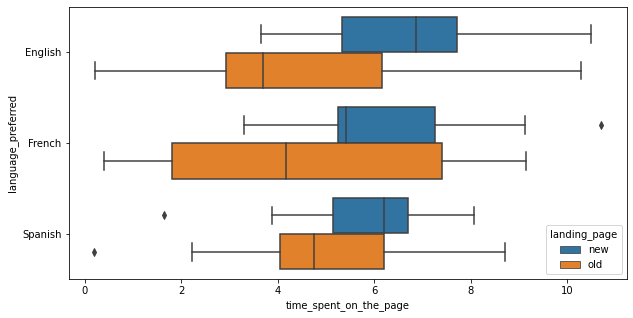

In [419]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'language_preferred', hue='landing_page')
plt.show()

#### Analysis of Converted vs Landing Page

In [420]:
pd.crosstab(df['converted'],df['landing_page'])

landing_page,new,old
converted,,
no,17,29
yes,33,21


**Bivariate Observations**
* The treatment group is spending more time on the page
* Treatment group median is around 6 while control group median is a little above 4
* The medians are close between language preferred
* English and French have a wider dispersion of the data than Spanish
* Most users spent more time on the new landing page vs old
* Most users spent more time on the page when they were converted
* Each language has the same number of users on the old vs new landing pages
* 65% of English users converted, while 44% of French users converted and 52% of Spanish users converted
* Each language has an increase in time spent for on the new landing page, but English looks to have increased the most
* The number of users converted on the new landing page is higher than the old

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

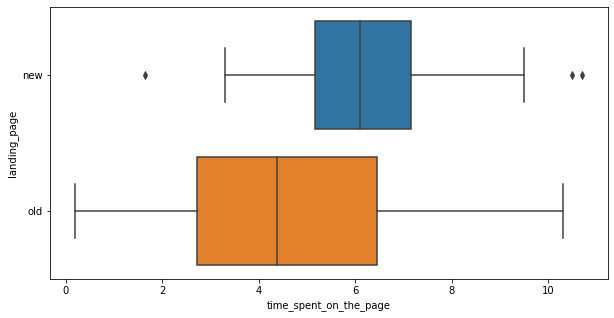

In [421]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'landing_page')
plt.show()

**Observations**
* The median of time spent on the page for the new landing page is higher than the old landing page
* The old landing page had a wider range of data than the new one

### Step 1: Define the null and alternate hypotheses

$H_0$ : The mean time spent on page is equal 
>$H_0:\mu_1=\mu_2$

$H_a$ : The mean time on the new landing page is greater than old landing page 
>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

**Choosing Test** : We are comparing means from 2 independent populations where we do not know the standard deviations. We are only looking if the mean is greater than so this is a 1 tailed test.

**Test To Use** : We will use a 2 sample T-Test with Unequal Standard Deviations

#### 2 Sample T-Test Assumptions
* **Continuous Data** - Yes time spent is measured on a continuous scale
* **Normally Distributed Populations** - Yes the populations are assumed to be normal
* **Independent Populations** - Yes We are taking random samples for 2 different types of users from independent populations
* **Unequal Population Standard Deviation** - Yes from Step 4 we calculated the standard deviations are different
* **Random Sampling From the Population** - Yes the populations were randomly sampled


### Step 3: Decide the significance level

**Significance Level** : We will use a significance level of 0.05

### Step 4: Collect and prepare data

In [422]:
old_time_spent = df.loc[df['landing_page'] == 'old']['time_spent_on_the_page']
new_time_spent = df.loc[df['landing_page'] == 'new']['time_spent_on_the_page']

print("Statistics on Time Spent on Old Landing Page")
print(old_time_spent.describe())
print("--------------------------------------------")
print("Statistics on Time Spent on New Landing Page")
print(new_time_spent.describe())

Statistics on Time Spent on Old Landing Page
count    50.000000
mean      4.532400
std       2.581975
min       0.190000
25%       2.720000
50%       4.380000
75%       6.442500
max      10.300000
Name: time_spent_on_the_page, dtype: float64
--------------------------------------------
Statistics on Time Spent on New Landing Page
count    50.000000
mean      6.223200
std       1.817031
min       1.650000
25%       5.175000
50%       6.105000
75%       7.160000
max      10.710000
Name: time_spent_on_the_page, dtype: float64


**Observations**
* Mean on old is 4.53 while new is 6.22
* Median of old is 4.38 while new is 6.105
* Standard Deviation on old is 2.58 while new is 1.817
* Since standard deviations are assumed different between old and new, we have to use 2 sample T-Test  with unequal Standard Deviations

### Step 5: Calculate the p-value

In [423]:
test_stat, p_value = stats.ttest_ind(new_time_spent, old_time_spent, equal_var = False, alternative = 'greater')
print('Test statistics =',test_stat)
print('P-value =', p_value)

Test statistics = 3.7867702694199856
P-value = 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [424]:
if p_value < 0.05:
    print(('As p-value {} is less than the level of significance, we reject the null hypothesis.').format(str(p_value)))
else:
    print(('As p-value {} is greater than the level of significance, we fail to reject the null hypothesis').format(str(p_value)))

As p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

**Observations**
* As the p-value is less than the level of significance we reject the null hypothesis
* We can conclude that the alternate hypothesis is true and the new time spent is greater than the old time spent

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

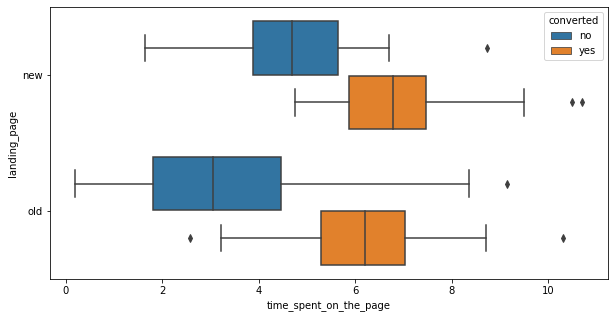

In [425]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'landing_page', hue='converted')
plt.show()

In [426]:
pd.crosstab(df['converted'],df['landing_page'],normalize='columns')

landing_page,new,old
converted,,
no,0.34,0.58
yes,0.66,0.42


**Obervations**
* Based on the above chart, the conversion rate seems higher for those who visited the new landing page than the old
* The conversion rate for the new landing page is 66% compared to 42% on the old

### Step 1: Define the null and alternate hypotheses

$H_0$ : The conversion rate is equal between new and old
>$H_0:p_1 =p_2$

$H_a$ : The new landing page has a greater conversion rate than the old
>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

**Choosing Test** : We are comparing population proportions from 2 independent populations where we do not know the standard deviations. We are only looking if the proportion is greater for the new vs the old

**Test To Use** : We will use a 2 proportion Z-Test

#### Z-Test Assumptions
* **Binomally distributed** - Yes options are either converted or not converted
* **Random Sample from the population** - Yes this was 100 randomly selected users
* **Can the binomial distribution approximated to Normal Distribution** - Yes results are greater than 10

### Step 3: Decide the significance level

**Significance Level** : We will use a significance level of 0.05

### Step 4: Collect and prepare data

In [427]:
new_converted = df.loc[df['landing_page'] == 'new']['converted'].value_counts()['yes']
old_converted = df.loc[df['landing_page'] == 'old']['converted'].value_counts()['yes']
total_new = len(df.loc[df['landing_page'] == 'new'])
total_old = len(df.loc[df['landing_page'] == 'old'])
print('Number of users on old landing page =',total_old)
print('Number of users on new landing page =',total_new)
print('Number of users converted from old landing page =',old_converted)
print('Number of users converted from new landing page =',new_converted)

Number of users on old landing page = 50
Number of users on new landing page = 50
Number of users converted from old landing page = 21
Number of users converted from new landing page = 33


### Step 5: Calculate the p-value

In [428]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([new_converted, old_converted],[total_new,total_old], value = 0, alternative='larger')

print('Test statistics =',test_stat)
print('P-value =', p_value)

Test statistics = 2.4077170617153842
P-value = 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [429]:
if p_value < 0.05:
    print(('As p-value {} is less than the level of significance, we reject the null hypothesis.').format(str(p_value)))
else:
    print(('As p-value {} is greater than the level of significance, we fail to reject the null hypothesis').format(str(p_value)))

As p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

**Observations**
* As the p-value is less than the level of significance we reject the null hypothesis
* We can conclude that the alternate hypothesis is true and the landing page has greater conversion rate than the old one

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

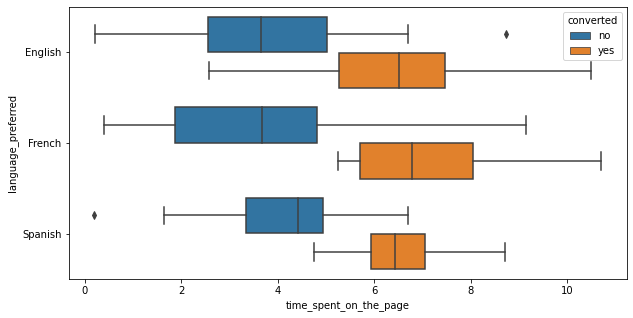

In [430]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'language_preferred', hue='converted')
plt.show()

**Obeservations**
* Based on looking only at the chart, it seems conversion and language are independent
* Each language and converted type seem to be in similar ranges

### Step 1: Define the null and alternate hypotheses

Null Hypothesis

>$H_0:$ Conversion is independent of preferred language

Alternative Hypothesis

>$H_a:$ Conversion depends on preferred language

### Step 2: Select Appropriate test

**Choosing Test** : We are comparing 2 categorical variables

**Test To Use** : We will use a Chi-Square Test for Independence

#### Chi-Square Test Assumptions
* **Categorical Variables** - Yes both variables are categorical
* **Expected Value of the Number of Sample Observations in Each Level is 5** - Yes numbers are above 5, which is confirmed is crosstab below
* **Random Sampling From the Population** - Yes the sample that was used was a random sample

### Step 3: Decide the significance level

**Significance Level** : We will use a significance level of 0.05

### Step 4: Collect and prepare data

In [431]:
lang_preferred_converted = pd.crosstab(df['converted'],df['language_preferred'])
lang_preferred_converted

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [432]:
chi, p_value, dof, expected = stats.chi2_contingency(lang_preferred_converted)
print("Chi =",chi)
print("P-value =",p_value)
print("Dof =",dof)
print("Expected =",expected)

Chi = 3.0930306905370837
P-value = 0.21298887487543447
Dof = 2
Expected = [[14.72 15.64 15.64]
 [17.28 18.36 18.36]]


### Step 6: Compare the p-value with $\alpha$

In [433]:
if p_value < 0.05:
    print(('As p-value {} is less than the level of significance, we reject the null hypothesis.').format(str(p_value)))
else:
    print(('As p-value {} is greater than the level of significance, we fail to reject the null hypothesis').format(str(p_value)))

As p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis


### Step 7:  Draw inference

**Observations**
* Since the P-Value is greater than the level of significance, we fail to reject the null hypothesis
* We can conclude that the conversion is independent of preferred language

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

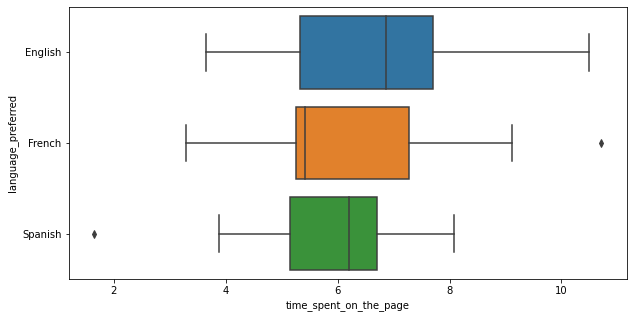

In [434]:
# Create new dataframe with just the new landing page
new_page = df[df['landing_page'] == 'new']
plt.figure(figsize=(10, 5))
sns.boxplot(data = new_page, x = 'time_spent_on_the_page', y = 'language_preferred')
plt.show()

In [435]:
new_page.groupby('language_preferred')['time_spent_on_the_page'].agg(['mean','median','std','min','max'])

,mean,median,std,min,max
language_preferred,,,,,
English,6.663750,6.865,1.984150,3.65,10.50
French,6.196471,5.420,1.933394,3.30,10.71
Spanish,5.835294,6.200,1.525656,1.65,8.08


**Observations**
* The medians seem to differ between English, French and Spanish
* French looks to have a large right skew
* English has the highest mean and median
* French has the 2nd highest mean, but the lowest median
* Spanish has the lowest mean, but the 2nd highest median

### Step 1: Define the null and alternate hypotheses

Null Hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

Alternative Hypothesis

>$H_a: $ At least one carbon emission level is different from the rest.

### Step 2: Select Appropriate test

**Choosing Test** : We are comparing the means of 3 different languages

**Test To Use** : We will have to use a 1 Way Anova Test

#### 1 Way Anova Test Assumptions
* **Testing of Normality** - We will need to run the Shapiro-Wilk's test on the responsible variable
* **Equality of Variance** - We will need to run the Levene test on the responsible variable

#### Shapiro-Wilk's Test

Null Hypothesis

>$H_0:$ Time spent on the new landing page follows a normal distribution

Alternative Hyptohesis

>$H_a:$ Time spent on the new landing page does not follow a normal distribution

In [436]:
w, p_value = stats.shapiro(new_page['time_spent_on_the_page'])
print("w =",w)
print("P-value =",p_value)

w = 0.9857664704322815
P-value = 0.8040016293525696


**Observations**
* Since the p-value is larger than 0.05, we fail to reject the null hypothesis that the landing page follows the normal distribution

#### Levene’s test

Null Hypothesis

>$H_0$: All the population variances are equal

Alternative Hypothesis

>$H_a$: At least one variance is different from the rest

In [437]:
statistic, p_value = stats.levene(new_page['time_spent_on_the_page'][new_page['language_preferred'] == 'English'],
                                 new_page['time_spent_on_the_page'][new_page['language_preferred'] == 'French'],
                                 new_page['time_spent_on_the_page'][new_page['language_preferred'] == 'Spanish'])

print("Statistic =",statistic)
print("P-value =",p_value)

Statistic = 0.7736446756800186
P-value = 0.46711357711340173


**Observations**
* Since the p-value is larger than 0.05, we fail to reject the null hypothesis of homogeneity of variances

### Let's test whether the assumptions are satisfied or not

* **The populations are normally distributed** - Yes the normality assumption is verified using the Shapiro-Wilk’s test
* **Samples are independent simple random samples** - Yes this is a random sample
* **Population variances are equal** - Yes the homogeneity of variance assumption is verified using the Levene's test

### Step 3: Decide the significance level

**Significance Level** : We will use a significance level of 0.05

### Step 4: Collect and prepare data

In [438]:
new_page.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


### Step 5: Calculate the p-value

In [439]:
test_stat, p_value = stats.f_oneway(new_page['time_spent_on_the_page'][new_page['language_preferred'] == 'English'],
                                 new_page['time_spent_on_the_page'][new_page['language_preferred'] == 'French'],
                                 new_page['time_spent_on_the_page'][new_page['language_preferred'] == 'Spanish'])

print('Test statistic =',test_stat)
print('P-value =',p_value)

Test statistic = 0.8543992770006822
P-value = 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [440]:
if p_value < 0.05:
    print(('As p-value {} is less than the level of significance, we reject the null hypothesis.').format(str(p_value)))
else:
    print(('As p-value {} is greater than the level of significance, we fail to reject the null hypothesis').format(str(p_value)))

As p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis


### Step 7:  Draw inference

**Observations**
* Since the P-value is greater than the level of significance we fail to reject the null hypothesis
* We can conclude that the time spent on the new page is the same for different language users

## Conclusion and Business Recommendations

**Conclusion**
* The new landing page has users spend more time on the page than the old landing page
* The conversion rate for the new landing page is higher than the conversion rate for the old landing page
* Conversion rate and language preferred are independent of each other
* The time spent on the new page is the same for users with different preferred languages

**Business Recommendations**
* We would recommend that the business moves forward with the new landing page
* The new landing page draws users to spend more time on the page
* We do not have to market to different preferred languages as the time spent is the same across the 3 languages
* The new landing page has a high conversion rate for new subscribers